<a href="https://colab.research.google.com/github/XIANGYU-MAO/FIT5230/blob/main/Copy_of_Week_2_Intro_to_Google_Colab_%26_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FIT5230 Malicious AI**
# Week 2 Lab: Introduction to Google Colab & Machine Learning

👉 ***Copy this Colab notebook to your Drive***

Read the instruction and fill the missing code in the Lab Activities. After that, run those cells to observe the results.


# Task 1: Getting Started with Google Colab

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

In [ ]:
## YOUR CODE STARTS HERE ##
# Calculate seconds in a week using the variable "seconds_in_a_day"
seconds_in_a_week =

## YOUR CODE ENDS HERE ##
seconds_in_a_week

## Mounting Google Drive locally

The example below shows how to mount your Google Drive on your runtime using an authorization code, and how to write and read files there. Once executed, you will be able to see the new file (`foo.txt`) at [https://drive.google.com/](https://drive.google.com/).

This only supports reading, writing, and moving files; to programmatically modify sharing settings or other metadata, use one of the other options below.

**Note:** When using the 'Mount Drive' button in the file browser, no authentication codes are necessary for notebooks that have only been edited by the current user.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
with open('/content/drive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')

!cat /content/drive/My\ Drive/foo.txt

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/foo.txt'

In [ ]:
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')


## Using Google Colab with GitHub
[Google Colaboratory](http://colab.research.google.com) is designed to integrate cleanly with GitHub, allowing both loading notebooks from github and saving notebooks to github.



### Loading Public Notebooks Directly from GitHub
Colab can load public github notebooks directly, with no required authorization step. For example

* Consider the notebook at this address: https://github.com/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb.

* The direct colab link to this notebook is: https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb.

* To generate such links in one click, you can use the [Open in Colab](https://chrome.google.com/webstore/detail/open-in-colab/iogfkhleblhcpcekbiedikdehleodpjo) Chrome extension.


### Browsing GitHub Repositories from Colab
Colab also supports special URLs that link directly to a GitHub browser for any user/organization, repository, or branch. For example:

*  http://colab.research.google.com/github will give you a general github browser, where you can search for any github organization or username.
*  http://colab.research.google.com/github/googlecolab/ will open the repository browser for the googlecolab organization. Replace googlecolab with any other github org or user to see their repositories.


## Executing Shell Commands
You can also execute shell commands by prefixing them with the ! character. This allows you to run terminal commands directly from your Colab notebook. For example:


In [ ]:
! git clone https://github.com/facebookresearch/audioseal.git


In [ ]:
! pip install numpy

## Data Visualization
A common use for notebooks is data visualization using charts. Colaboratory makes this easy with several charting tools available as Python imports.

<h1>Example 1</h1>

<h2>Chart: Line Plots in Matplotlib</h2>


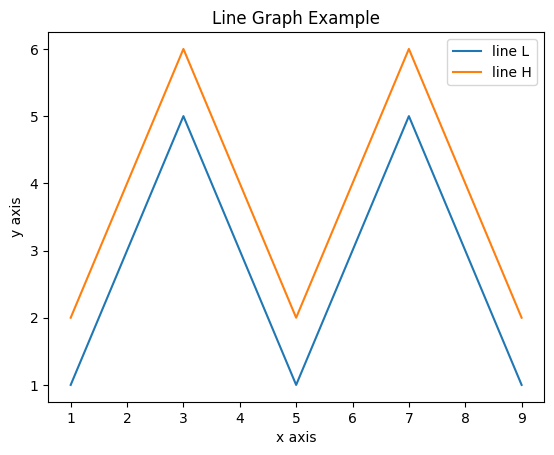

In [ ]:
import matplotlib.pyplot as plt

x  = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y1 = [1, 3, 5, 3, 1, 3, 5, 3, 1]
y2 = [2, 4, 6, 4, 2, 4, 6, 4, 2]
plt.plot(x, y1, label="line L")
plt.plot(x, y2, label="line H")
plt.plot()

plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.legend()
plt.show()

<h1>Example 2</h1>

<h2>Visualization: Interactive Scatter Plot in Altair</h2>

Altair lets you easily create an interactive scatter plot from data stored in a Pandas dataframe.

In [ ]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

# plot the dataset, referencing dataframe column names
import altair as alt
alt.Chart(cars).mark_point().encode(
  x='Horsepower',
  y='Miles_per_Gallon',
  color='Origin'
).interactive()

Index(['Name', 'Miles_per_Gallon', 'Cylinders', 'Displacement', 'Horsepower',
       'Weight_in_lbs', 'Acceleration', 'Year', 'Origin'],
      dtype='object')


alt.Chart(...)

# Task 2: Introduction to Machine Learning

Machine learning involves building mathematical models to help understand data. At the most fundamental level, machine learning can be categorized into two main types: supervised learning and unsupervised learning.

- *Supervised learning*: Models that can predict labels based on labeled training data

  - *Regression*: Models that predict continuous labels
  - *Classification*: Models that predict labels as two or more discrete categories
  
- *Unsupervised learning*: Models that identify structure in unlabeled data

  - *Clustering*: Models that detect and identify distinct groups in the data
  - *Dimensionality reduction*: Models that detect and identify lower-dimensional structure in higher-dimensional data

In addition, there are so-called semi-supervised learning methods, which falls somewhere between supervised learning and unsupervised learning. Semi-supervised learning methods are often useful when only incomplete labels are available.

We will see examples of both types of supervised learning in the following section.

## Lab Activities 1: Linear Regression

Linear regression models are a good starting point for regression tasks. Such models are popular because they can be fit very quickly, and are very interpretable. You are probably familiar with the simplest form of a linear regression model (i.e., fitting a straight line to data) but such models can be extended to model more complicated data behavior.

In this section we will start with a quick intuitive walk-through of the mathematics behind this well-known problem, before seeing how before moving on to see how linear models can be generalized to account for more complicated patterns in data.
We begin with the standard imports:

### Method 1: Manual Formulation
Linear regression is a method used to find a relationship between a dependent variable and a set of independent variables.

We will start with the most familiar linear regression, a straight-line fit to observed data.
A straight-line fit is a model of the form
$$
y = w * x + b
$$
where

* $y$ is the dependent variable
* $x$ is the independent variable
* $w$ is the *slope* also known as weight matrix
* $b$ is the *intercept* also known as bias

First we will import the library and necessary datasets.

In [ ]:
# Import numpy, pandas and sklearn Library

# Python library used for working with arrays.
# It also has functions for working in domain of linear algebra, fourier transform, and matrices.
import numpy as np

# Python library for data manipulation and analysis.
# It offers data structures and operations for manipulating numerical tables and time series.
import pandas as pd

# Plotting library for the Python programming language
import matplotlib.pyplot as plt

Download the Student Scores dataset from [this link](https://drive.google.com/file/d/1rYZpCo53uo2Bx-UbNVJ9mmDyKaHeDSIZ/view?usp=sharing) and upload to the session storage.

In [ ]:
### YOUR CODE STARTS HERE

# Import the student_scores.csv as pandas dataframe using 'read_csv()' function (1 line)
dataset =

## YOUR CODE ENDS HERE ##

dataset

The next step is to divide the data into "attributes" and "labels".

Attributes are the independent variables while labels are dependent variables whose values are to be predicted. In our dataset we only have two columns. We want to predict the percentage score depending upon the hours studied.

Therefore our attribute set will consist of the "Hours" column, and the label will be the "Score" column. To extract the attributes and labels, execute the following script:

In [ ]:
## YOUR CODE STARTS HERE ##

# Preparing the Dataset with attribute "Hours" as 'x' and labels "Score" as 'y'
x =
y =

## YOUR CODE ENDS HERE ##

In [ ]:
## YOUR CODE STARTS HERE ##
#  Plot the dataset in scatter plot with x and y

## YOUR CODE ENDS HERE ##

plt.title('Dataset')
plt.show()

To create the model’s equation we have to get the value of $w$ and $b$ , we can get this from the Y and X with the equations below:

$$
 w = \frac{\sum (x_i - \bar{x}) (y_i - \bar{y})}{\sum (x_i - \bar{x})^2}
$$

$$
 b = \bar{y} - w \bar{x}
$$

In [ ]:
## YOUR CODE STARTS HERE ##
# Calculate the slope, define the slope function (1 line)
w =

#np.mean, np.sum, **2

# Calculate the intercept, define the intercept function
b =

# Define your model's equation with the slope and intercept formula defined above
def f(x):
  return

## YOUR CODE ENDS HERE ##


In [ ]:
# Plot your model equation on the dataset
plt.plot(x, f(x), color='red')
plt.scatter(x, y, color='blue')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Dataset')
plt.show()

To blow your mind now, did you know that this is the model’s equation. and we just created a model without using scikit learn. We will confirm it now using the second method which is the scikit learn Linear Regression package

### Method 2: Using scikit-learn

There are several Python libraries that provide solid implementations of a range of machine learning algorithms.
One of the best known is [Scikit-Learn](http://scikit-learn.org), a package that provides efficient versions of a large number of common algorithms.

**Preparing the dataset**

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in `train_test_split()` method.

In [ ]:
## YOUR CODE STARTS HERE ##

from sklearn.model_selection import train_test_split

# Split the data and targets into training/testing sets (1 line) (20% for testing and 80% for training)
X_train, X_test, y_train, y_test =

## YOUR CODE ENDS HERE

# Reshape the array - the shape of the array (how you present your data) is important
X_train_array = X_train.values.reshape(-1,1)
X_test_array = X_test.values.reshape(-1,1)
y_train_array = y_train.values.reshape(-1,1)
y_test_array = y_test.values.reshape(-1,1)

#reshape(-1,1):
#-1 means that it is an unknown dimension and we want numpy to figure it out
#1: specifies that the reshaped array should have exactly 1 column.

The above script splits 80% of the data to training set while 20% of the data to test set. The test_size variable is where we actually specify the proportion of test set

**Training the Algorithm**

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

With Scikit-Learn it is extremely straight forward to implement linear regression models, as all you really need to do is import the LinearRegression class, instantiate it, and call the `fit()` method along with our training data. This is about as simple as it gets when using a machine learning library to train on your data.


In [ ]:
## YOUR CODE STARTS HERE ##

from sklearn.linear_model import LinearRegression
# Instantiate the Linear Regression Model (1 line)
regressor =
# Call the 'fit()' method along with our training data (1 line)

## YOUR CODE ENDS HERE

In the theory section we said that linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. To see the value of the intercept and slop calculated by the linear regression algorithm for our dataset, execute the following code.


In [ ]:
print("Model intercept:", regressor.intercept_)
print("Model slope:    ", regressor.coef_[0])

**Making Predictions**

Now that we have trained our algorithm, it's time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. To make predictions on the test data, execute the following script:



In [ ]:
## YOUR CODE STARTS HERE

# Call the 'predict()' method along with X_test to make prediction on the test data (1 line)
y_pred =

## YOUR CODE ENDS HERE ##

The `y_pred` is a numpy array that contains all the predicted values for the input values in the `x_test` series.

To compare the actual output values for `x_test` with the predicted values, execute the following script:

In [ ]:
df = pd.DataFrame({'Actual': y_test_array.flatten(), 'Predicted': y_pred.flatten()})
df

Though our model is not very precise, the predicted percentages are close to the actual ones.

**Evaluating the Algorithm**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:

1. Mean Absolute Error (MAE) is the mean of the absolute value of the errors.

2. Mean Squared Error (MSE) is the mean of the squared errors.

3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.

The Scikit-Learn library comes with pre-built functions that can be used to find out these values for us.

Let's find the values for these metrics using our test data. Execute the following code:

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

You can see that the value of root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. This means that our algorithm did a decent job.

In [ ]:
## YOUR CODE STARTS HERE ##

# Plot test outputs and prediction lines (2 lines)

## YOUR CODE STARTS HERE ##

1. Why do slope and intercept results differs in Manual Computation and Scikit Learn method?


2. What does slope means in Linear Regression (try to explain in the setting of hours studied and score)?


3. What do MAE, MSE and RMSE tell you?




# Task 3: MNIST Digit Classification

This activity shows how scikit-learn can be used to recognize images of hand-written digits, from 0-9.

* Support Vector Machine (SVM): supervised learning algorithm used for classification and regression tasks

In [ ]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents and this is included in the title of the 4 plots below.

Note: if we were working from image files (e.g., ‘png’ files), we would load them using matplotlib.pyplot.imread.

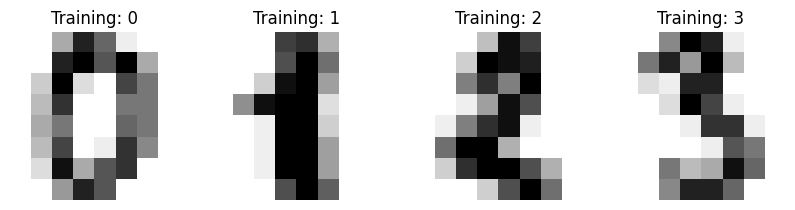

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

# Plot Datasets
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

To apply a classifier on this data, we need to flatten the images, turning each 2-D array of grayscale values from shape (8, 8) into shape (64,). Subsequently, the entire dataset will be of shape (n_samples, n_features), where n_samples is the number of images and n_features is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support vector classifier on the train samples. The fitted classifier can subsequently be used to predict the value of the digit for the samples in the test subset.

In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))


## YOUR CODE STARTS HERE ##

# Create a classifier: a support vector classifier with gamma value of 0.001 (1 line)
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets (1 line)
X_train, X_test, y_train, y_test =

# Learn the digits on the train subset (1 line)

# Predict the value of the digit on the test subset (1 line)
predicted =

## YOUR CODE ENDS HERE ##

Below we visualize the first 4 test samples and show their predicted digit value in the title.

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

[classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report) builds a text report showing the main classification metrics.

In [ ]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

We can also plot a [confusion matrix](https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix) of the true digit values and the predicted digit values.

In [ ]:
cm = metrics.confusion_matrix(y_test, predicted,  labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## Data Pre-processing
In image processing, a kernel (also known as a convolution matrix or mask) is a small matrix used for various effects such as blurring, sharpening, embossing, and edge detection. This is achieved through a convolution operation, where each pixel in the output image is computed based on a function (the kernel) of the surrounding pixels (including itself) in the input image. Different pre-processing techniques can be applied to the input data to remove noise or enhance the quality of the data.

Explore different image processing techniques below to see how that affect the classification results in the example above:


*   Gaussian blur
*   Sharpening
*   Edge detection








In [ ]:
import cv2 as cv
import numpy as np

## YOUR CODE STARTS HERE ##
# kernel for Gaussian blur
kernel1 = (1 / 16.0) * np.array([[1., 2., 1.],
                                  [2., 4., 2.],
                                  [1., 2., 1.]])
# kernel for sharpening an image
kernel2 =
# kernel for edge detection
kernel3 =

iteration = 1

digitsIm = np.copy(digits.images)
for i,image in enumerate(digits.images):
   for j in range(iteration):
    digitsIm[i] = cv.filter2D(src=image, ddepth=-1, kernel=kernel1)

## YOUR CODE ENDS HERE ##

# flatten the images
n_samples = len(digits.images)
data = digitsIm.reshape((n_samples, -1))

# Create a classifier: a support vector classifier with gamma value of 0.001 (1 line)
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets (1 line)
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset (1 line)
clf.fit(X_train, y_train)
# Predict the value of the digit on the test subset (1 line)
predicted = clf.predict(X_test)



Below we visualize the first 4 test samples (with image processing technique) and show their predicted digit value in the title. The classification report is generated.

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Compare the confusion matrix before and after applying the image processing techniques.

In [ ]:
cm = metrics.confusion_matrix(y_test, predicted,  labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## TODO Advanced task: Experiment with different gamma values and see how the results change.



## Bits of Deep Learning Jargon

Here is the modern deep learning terminology for all the pieces we may discuss in future labs:

- The functional form of the *model* is called its *architecture* (but be careful—sometimes people use *model* as a synonym of *architecture*, so this can get confusing).
- The *weights* are called *parameters*.
- The *predictions* are calculated from the *independent variable*, which is the *data* not including the *labels*.
- The *results* of the model are called *predictions*.
- The measure of *performance* is called the *loss*.
- The loss depends not only on the predictions, but also the correct *labels* (also known as *targets* or the *dependent variable*); e.g., "dog" or "cat."



```
# This is formatted as code
```

## Image Recognizer Can Tackle Non-Image Task

An image recognizer can, as its name suggests, only recognize images. But a lot of things can be represented as images, which means that an image recogniser can learn to complete many tasks.

For instance, a sound can be converted to a spectrogram, which is a chart that shows the amount of each frequency at each time in an audio file. A student used this approach with Fast.ai to easily beat the published accuracy of a state-of-the-art [environmental sound detection model](https://medium.com/@etown/great-results-on-audio-classification-with-fastai-library-ccaf906c5f52) using a dataset of 8,732 urban sounds.


<img alt="show_batch with spectrograms of sounds" width="400" caption="show_batch with spectrograms of sounds" id="img_spect" src="https://miro.medium.com/max/1400/1*mrM9tIOZMW_2bxeW64dPog.png">



Another example comes from the paper ["Malware Classification with Deep Convolutional Neural Networks"](https://ieeexplore.ieee.org/abstract/document/8328749) by Mahmoud Kalash et al., which explains that "the malware binary file is divided into 8-bit sequences which are then converted to equivalent decimal values. This decimal vector is reshaped and a gray-scale image is generated that represents the malware sample."

<img alt="Malware classification process" width="623" caption="Malware classification process" id="malware_proc" src="https://raw.githubusercontent.com/fastai/fastbook/master/images/att_00055.png">

The authors then show "pictures" generated through this process of malware in different categories.

<img alt="Malware examples" width="650" caption="Malware examples" id="malware_eg" src="https://raw.githubusercontent.com/fastai/fastbook/master/images/att_00056.png">

As you can see, the different types of malware look very distinctive to the human eye. The model the researchers trained based on this image representation was more accurate at malware classification than any previous approach shown in the academic literature. This suggests a good rule of thumb for converting a dataset into an image representation: if the human eye can recognize categories from the images, then a deep learning model should be able to do so too.

In general, you'll find that a small number of general approaches in deep learning can go a long way, if you're a bit creative in how you represent your data!

Reference:

*   [Google Colab](http://colab.research.google.com/)
*   [Fastai Open Source](https://docs.fast.ai)
*   [Pytorch](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)

